In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('./data/train.csv',header=0)

features = pd.read_csv('./data/features.csv',header=0)

stores = pd.read_csv('./data/stores.csv',header=0)

In [3]:
df=pd.merge(train,features,on=['Store','Date','IsHoliday'],how='inner')
df=pd.merge(df,stores,on='Store',how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [4]:
df.isna().mean()*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
markdown = pd.DataFrame(SimpleImputer().fit_transform(df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]),columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
df = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
df=pd.concat([df,markdown],axis=1)

In [7]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079


In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
del df['Date']
df.head(2)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,year,month,day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
1,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5


In [9]:
from sklearn.preprocessing import LabelEncoder

df['Type']=LabelEncoder().fit_transform(df['Type'])
df['IsHoliday']=LabelEncoder().fit_transform(df['IsHoliday'])
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int32
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
year              int64
month             int64
day               int64
dtype: object

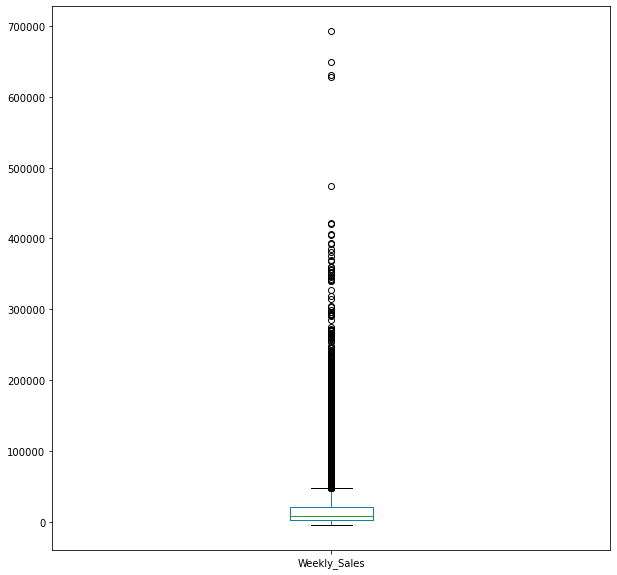

In [10]:
from matplotlib import pyplot as plt
plt.subplots(figsize=(10,10))
df['Weekly_Sales'].plot.box()

In [11]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,year,month,day
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,2010,2,5


In [12]:
df.isnull().any().any()

False

In [13]:
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int32
Size              int64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
year              int64
month             int64
day               int64
dtype: object

In [14]:
def scatter_plot(dataframe, column):
    plt.scatter(df[column],df['Weekly_Sales'],c='g',marker='.')
    plt.xlabel(column)
    plt.ylabel('Weekly_Sales')
    plt.title(column + ' vs ' + 'Weekly_Sales')
    plt.show()

In [15]:
df.duplicated().any()

False

In [16]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'year', 'month',
       'day'],
      dtype='object')

In [17]:
import seaborn as sns
def scatter_plot_seaborn(dataframe, column):
    sns.scatterplot(x=column,y='Weekly_Sales',data=dataframe,hue='Type',palette=['green','dodgerblue','red'])
    plt.xlabel(column)
    plt.ylabel('Weekly_Sales')
    plt.title(column + ' vs ' + 'Weekly_Sales')
    plt.show()

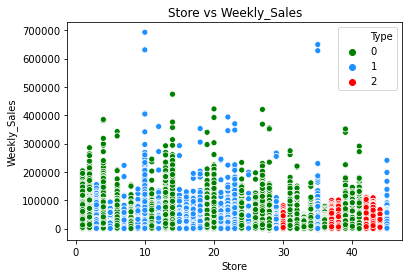

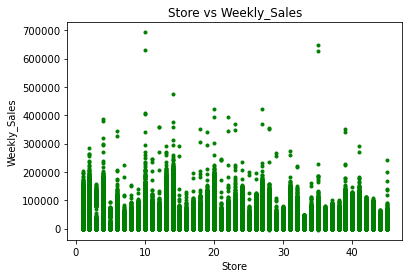

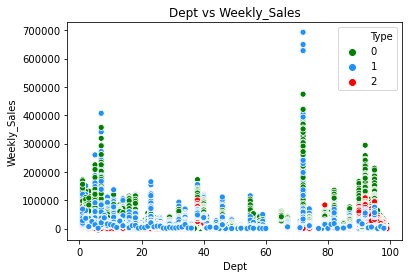

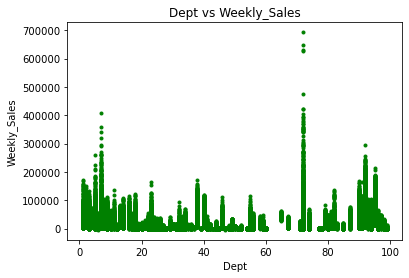

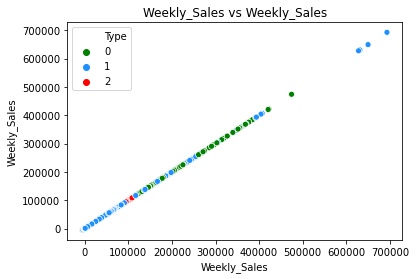

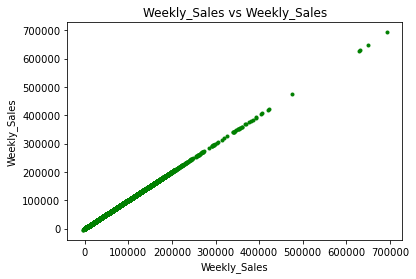

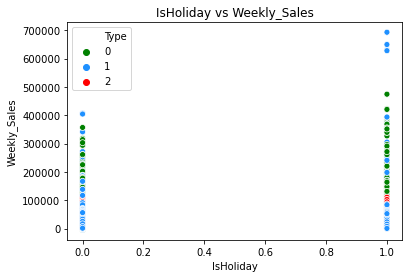

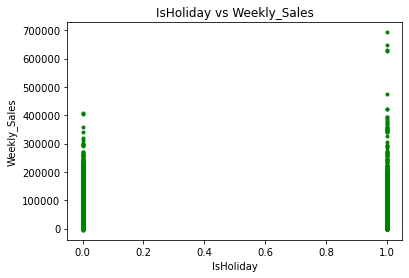

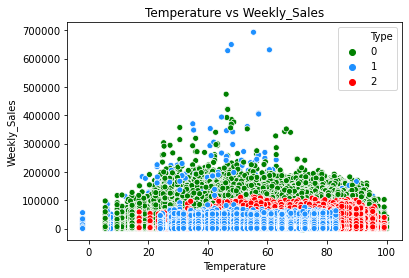

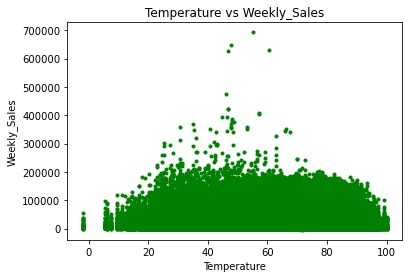

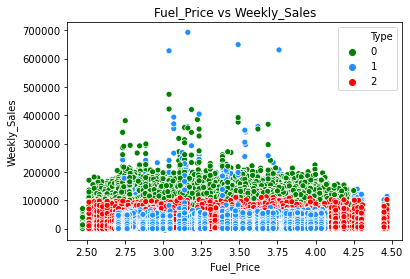

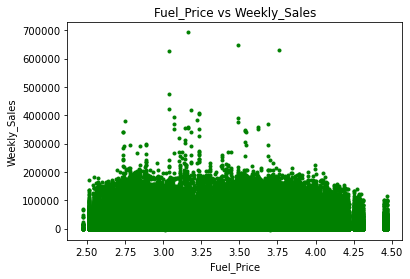

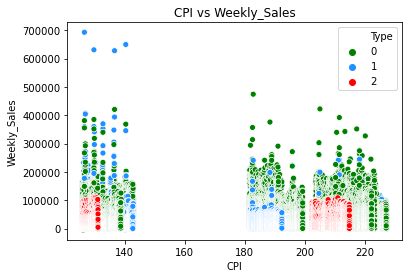

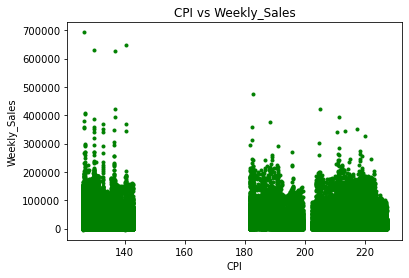

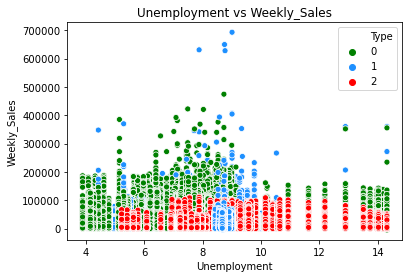

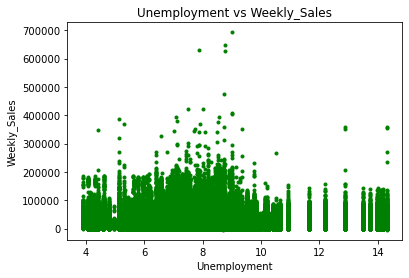

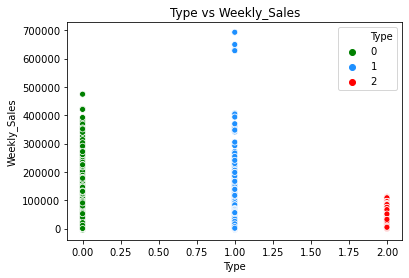

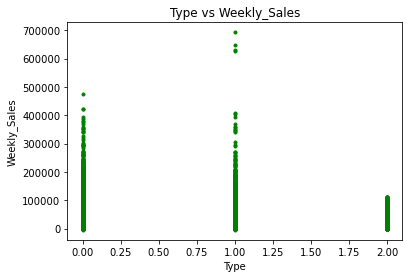

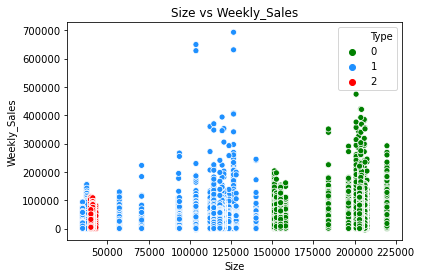

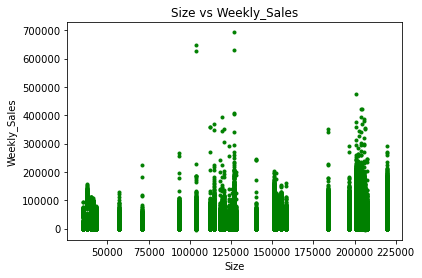

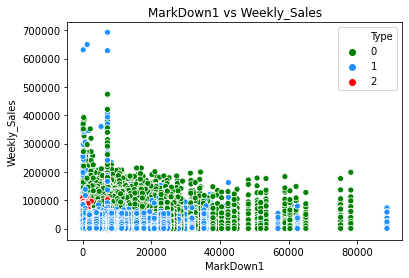

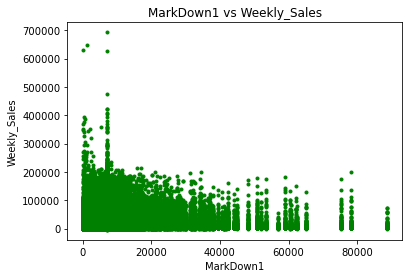

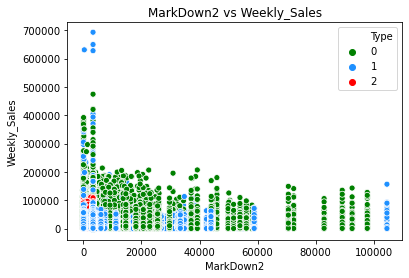

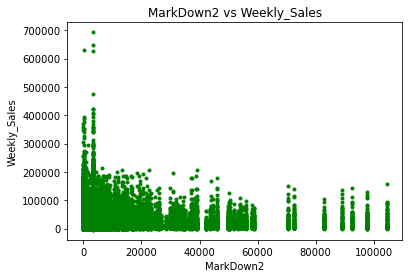

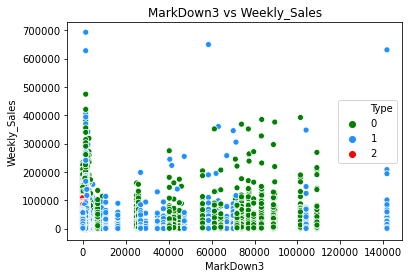

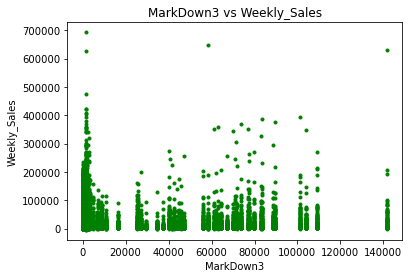

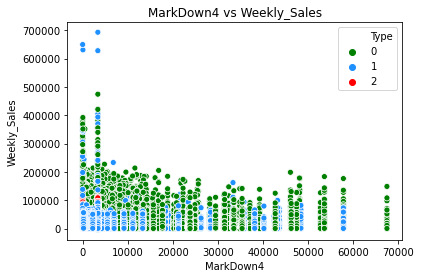

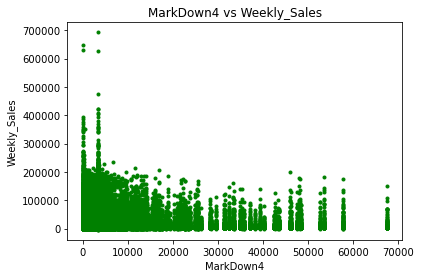

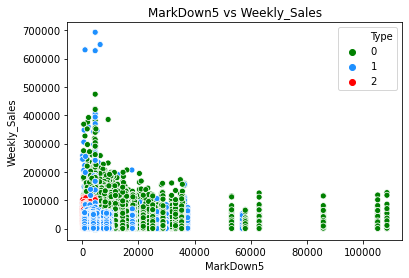

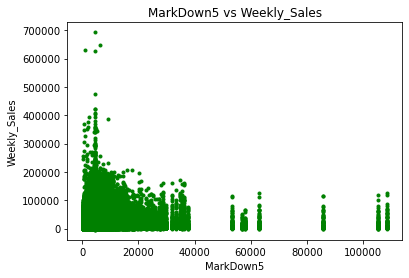

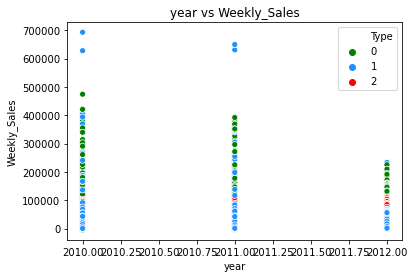

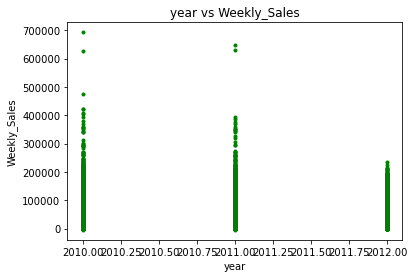

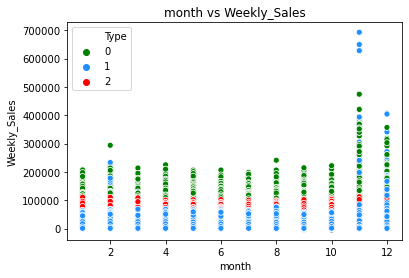

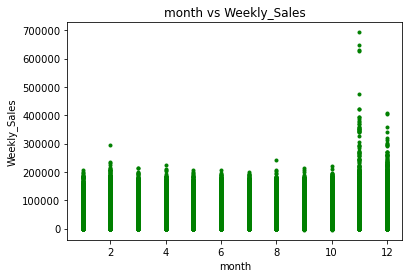

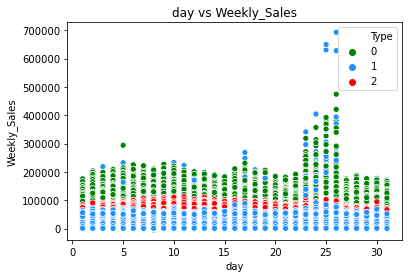

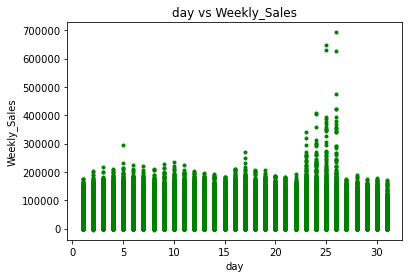

In [18]:
for column in df.columns.to_list():
    scatter_plot_seaborn(df,column)
    scatter_plot(df,column)